<a href="https://colab.research.google.com/github/Devavrata-Tripathy/tensorflow-intro/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.3.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
print(train_labels.dtype)
len(train_labels)

uint8


60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

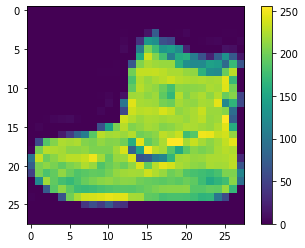

In [ ]:
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

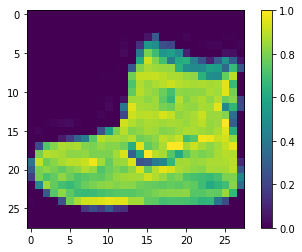

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

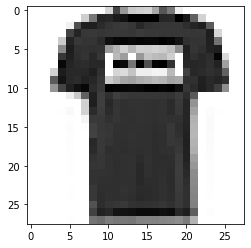

In [ ]:
plt.imshow(train_images[1], cmap = plt.cm.binary)

In [ ]:
model = tf.keras.Sequential([
                        tf.keras.layers.Flatten(input_shape = (28, 28)),
                        tf.keras.layers.Dense(128, activation = 'relu'),
                        tf.keras.layers.Dense(10)     
])

In [ ]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4983 - accuracy: 0.8256
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3683 - accuracy: 0.8675
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3330 - accuracy: 0.8788
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3142 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2953 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2788 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2678 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2591 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2477 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)
print('Test accuracy :', test_acc)

313/313 [==============================] - 0s 940us/step - loss: 0.3385 - accuracy: 0.8783
Test accuracy : 0.8783000111579895


In [ ]:
prob_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
predictions = prob_model.predict(test_images)
predictions[0]

array([4.6836522e-08, 8.8093532e-10, 4.3453199e-10, 2.6786062e-10,
       4.2884114e-09, 3.3405209e-03, 1.9214176e-06, 1.4183558e-02,
       3.1457692e-08, 9.8247391e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9